## 导入与下载数据

In [1]:
from surprise import Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=Dataset.load_builtin('ml-100k')

## 加载并查看数据

In [3]:
u_cols=['user_id', 'age', 'sex', 'occupation', 'zip_code']
users=pd.read_csv(r'/home/articuly/.surprise_data/ml-100k/ml-100k/u.user', sep='|', names=u_cols)
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [4]:
users.shape

(943, 5)

In [5]:
r_cols=['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings=pd.read_csv(r'/home/articuly/.surprise_data/ml-100k/ml-100k/u.data', sep='\t', names=r_cols)
ratings.head()

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
ratings.shape

(100000, 4)

In [7]:
ratings['date']=pd.to_datetime(ratings['unix_timestamp'], unit='s')
ratings.head()

,user_id,movie_id,rating,unix_timestamp,date
0,196,242,3,881250949,1997-12-04 15:55:49
1,186,302,3,891717742,1998-04-04 19:22:22
2,22,377,1,878887116,1997-11-07 07:18:36
3,244,51,2,880606923,1997-11-27 05:02:03
4,166,346,1,886397596,1998-02-02 05:33:16


In [8]:
m_cols=['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies=pd.read_csv(r'/home/articuly/.surprise_data/ml-100k/ml-100k/u.item', sep='|', names=m_cols, usecols=range(5), encoding='latin1')
movies.head()

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


In [9]:
movies.shape

(1682, 5)

In [10]:
movie_rating=pd.merge(movies, ratings)
movie_rating.head()

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,date
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,1998-02-17 17:28:52
1,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,287,5,875334088,1997-09-27 04:21:28
2,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,148,4,877019411,1997-10-16 16:30:11
3,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,280,4,891700426,1998-04-04 14:33:46
4,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,66,3,883601324,1997-12-31 20:48:44


In [11]:
movie_rating.shape

(100000, 9)

In [12]:
lens=pd.merge(movie_rating, users)
lens.head()

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,date,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,1998-02-17 17:28:52,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,1998-02-17 17:51:30,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,1998-02-17 18:20:08,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,1998-02-17 18:07:27,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,1998-02-17 17:31:36,60,M,retired,95076


In [13]:
lens.shape

(100000, 13)

In [14]:
# 评价最多的电影
lens['title'].value_counts()[:25]

Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Titanic (1997)      

In [15]:
# 按评价次数和评价均值，按均值高低排序
movie_stats=lens.groupby('title').agg({'rating': [np.size, np.mean]})
movie_stats.head(10)

rating          
                                              size      mean
title                                                       
'Til There Was You (1997)                        9  2.333333
1-900 (1994)                                     5  2.600000
101 Dalmatians (1996)                          109  2.908257
12 Angry Men (1957)                            125  4.344000
187 (1997)                                      41  3.024390
2 Days in the Valley (1996)                     93  3.225806
20,000 Leagues Under the Sea (1954)             72  3.500000
2001: A Space Odyssey (1968)                   259  3.969112
3 Ninjas: High Noon At Mega Mountain (1998)      5  1.000000
39 Steps, The (1935)                            59  4.050847

In [16]:
movie_stats.sort_values(by=[('rating', 'mean')], ascending=False).head(10)

rating     
                                                    size mean
title                                                        
They Made Me a Criminal (1939)                         1  5.0
Marlene Dietrich: Shadow and Light (1996)              1  5.0
Saint of Fort Washington, The (1993)                   2  5.0
Someone Else's America (1995)                          1  5.0
Star Kid (1997)                                        3  5.0
Great Day in Harlem, A (1994)                          1  5.0
Aiqing wansui (1994)                                   1  5.0
Santa with Muscles (1996)                              2  5.0
Prefontaine (1997)                                     3  5.0
Entertaining Angels: The Dorothy Day Story (1996)      1  5.0

In [17]:
# 评价少的电影在前面，均值有噪声

In [18]:
atleast_100=movie_stats['rating']['size']>=100
movie_stats[atleast_100].sort_values(by=[('rating', 'mean')], ascending=False)[:20]

rating          
                                                     size      mean
title                                                              
Close Shave, A (1995)                                 112  4.491071
Schindler's List (1993)                               298  4.466443
Wrong Trousers, The (1993)                            118  4.466102
Casablanca (1942)                                     243  4.456790
Shawshank Redemption, The (1994)                      283  4.445230
Rear Window (1954)                                    209  4.387560
Usual Suspects, The (1995)                            267  4.385768
Star Wars (1977)                                      583  4.358491
12 Angry Men (1957)                                   125  4.344000
Citizen Kane (1941)                                   198  4.292929
To Kill a Mockingbird (1962)                          219  4.292237
One Flew Over the Cuckoo's Nest (1975)                264  4.291667
Silence of the Lambs, The (1991)                      390  4.289744
North by Northwest (1959)                             179  4.284916
Godfather, The (1972)                                 413  4.283293
Secrets & Lies (1996)                                 162  4.265432
Good Will Hunting (1997)                              198  4.262626
Manchurian Candidate, The (1962)                      131  4.259542
Dr. Strangelove or: How I Learned to Stop Worry...    194  4.252577
Raiders of the Lost Ark (1981)                        420  4.252381

Text(0, 0.5, 'count of rating')

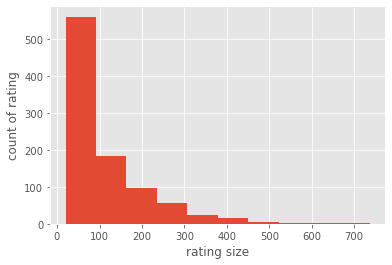

In [19]:
plt.style.use('ggplot')
lens.groupby('user_id').size().sort_values(ascending=False).hist()
plt.xlabel('rating size')
plt.ylabel('count of rating')

In [20]:
user_stats=lens.groupby('user_id').agg({'rating': [np.size, np.mean]})
user_stats.head()

rating          
          size      mean
user_id                 
1          272  3.610294
2           62  3.709677
3           54  2.796296
4           24  4.333333
5          175  2.874286

In [21]:
user_stats.describe()

rating            
             size        mean
count  943.000000  943.000000
mean   106.044539    3.588191
std    100.931743    0.445233
min     20.000000    1.491954
25%     33.000000    3.323054
50%     65.000000    3.620690
75%    148.000000    3.869565
max    737.000000    4.869565

In [22]:
# 大多数评分在3、4分间

## 用fastFM算法训练

它是Factoriztion Machines其中一个库，只支持LINUX系统，不能PIP安装则手动安装。它的输入是用户ID和物品ID当做分类变量，需要变换为虚拟变量，采用SK的DictVectorizer类完成

### 演示例子

In [33]:
from sklearn.feature_extraction import DictVectorizer
from fastFM import als

# 输入数据的原始数据，不包括标签数据
# 包括用户ID，评分物品ID，用户年龄的词典
train=[
    {'user':'1', 'item':'5', 'age':19},
    {'user':'2', 'item':'43', 'age':33},
    {'user':'3', 'item':'20', 'age':55},
    {'user':'4', 'item':'10', 'age':20}
]

# 利用DictVectorizer()将年龄以外的字段变换为虚拟变量
v=DictVectorizer()
X=v.fit_transform(train)

In [34]:
X.toarray()

array([[19.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.],
       [33.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
       [55.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.],
       [20.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [35]:
# 设面四人分别评分为5, 1, 2, 4
y=np.array([5, 1, 2, 4])

fm=als.FMRegression(n_iter=1000, init_stdev=0.1, rank=2, l2_reg_w=0.1, l2_reg_V=0.5)
fm.fit(X, y)

FMRegression(l2_reg_V=0.5, n_iter=1000, rank=2)

In [36]:
fm.predict(v.transform({'user':'5', 'item':'10', 'age':24}))

array([3.60775939])

### 正式训练

In [88]:
def load_data(filename, path=r'/home/articuly/.surprise_data/ml-100k/ml-100k/'):
    data=[]
    y=[]
    with open(path + filename) as f:
        for line in f:
            (user, movieid, rating, timestamp)=line.split('\t')
            data.append({'user_id':str(user), 'movie_id':str(movieid)})
            y.append(float(rating))
    return (data, np.array(y))

In [89]:
dev_data, y_dev=load_data('ua.base')
test_data, y_test = load_data('ua.test')

In [110]:
from sklearn.model_selection import train_test_split

v=DictVectorizer()
X_dev=v.fit_transform(dev_data)
X_test=v.transform(test_data)  # 已训练好不用再fit

In [111]:
X_dev

<90570x2623 sparse matrix of type '<class 'numpy.float64'>'
	with 181140 stored elements in Compressed Sparse Row format>

In [112]:
y_dev.shape

(90570,)

In [113]:
X_test

<9430x2623 sparse matrix of type '<class 'numpy.float64'>'
	with 18858 stored elements in Compressed Sparse Row format>

In [114]:
y_test.shape

(9430,)

In [95]:
X_train, X_valid, y_train, y_valid = train_test_split(X_dev, y_dev, test_size=0.1, random_state=42)

In [96]:
# 超参数不多，使用MCMC方法来训练
from sklearn.metrics import mean_squared_error
from fastFM import mcmc

n_iter=300
step_size=1
seed=123
rank=4

fm=mcmc.FMRegression(n_iter=0, rank=rank, random_state=seed)
fm.fit_predict(X_train, y_train, X_valid)

array([0., 0., 0., ..., 0., 0., 0.])

In [97]:
rmse_valid=[]
rmse_test=[]
hyper_param=np.zeros((n_iter-1, 3+2*rank), dtype=np.float64)

In [98]:
# 改变迭代次数，获得预测结果的性能与超参数
for nr, i in enumerate(range(1, n_iter)):
    fm.random_state=i*seed
    y_pred=fm.fit_predict(X_train, y_train, X_valid, n_more_iter=step_size)
    
    rmse_valid.append(np.sqrt(mean_squared_error(y_pred, y_valid)))
    hyper_param[nr, :]=fm.hyper_param_

In [99]:
# 最初5次迭代，数值不稳定，予以忽略
values=np.arange(1, n_iter)
x=values*step_size
x=x[5:]

In [100]:
print(np.min(rmse_valid))

0.8959692745565979


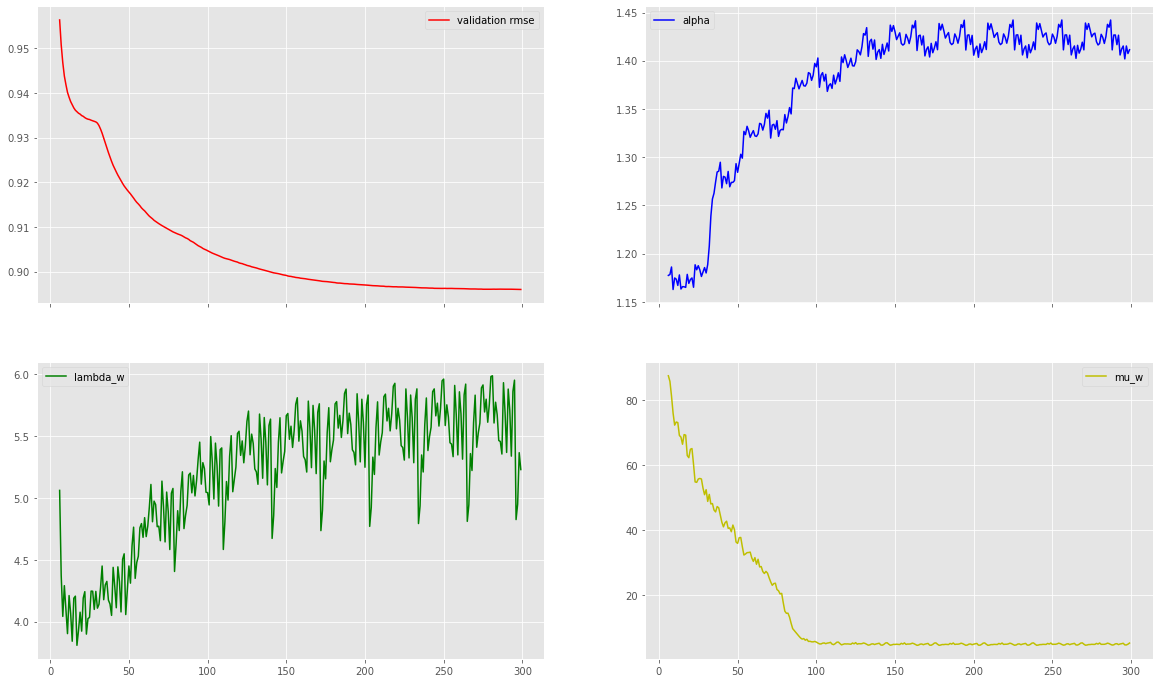

In [101]:
# 绘制RMSE和超参数变化图
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(20, 12))

ax[0, 0].plot(x, rmse_valid[5:], label='validation rmse', color='r')
ax[0, 0].legend()

ax[0, 1].plot(x, hyper_param[5:,0], label='alpha', color='b')
ax[0, 1].legend()

ax[1, 0].plot(x, hyper_param[5:,1], label='lambda_w', color='g')
ax[1, 0].legend()

ax[1, 1].plot(x, hyper_param[5:,3], label='mu_w', color='y')
ax[1, 1].legend()

In [102]:
# 增加矩阵压缩次数rank
n_iter=100
seed=333

rmse_test=[]
ranks=[4, 8, 16, 32, 64]

# 改变RANK进行训练和预测，获得dev test数据RMSE
for rank in ranks:
    fm=mcmc.FMRegression(n_iter=n_iter, rank=rank, random_state=seed)
    y_pred=fm.fit_predict(X_train, y_train, X_valid)
    rmse=np.sqrt(mean_squared_error(y_pred, y_valid))
    rmse_test.append(rmse)
    print('rank: {}    rmse: {:.4f}'.format(rank, rmse))

rank: 4    rmse: 0.9030
rank: 8    rmse: 0.8985
rank: 16    rmse: 0.8965
rank: 32    rmse: 0.8930
rank: 64    rmse: 0.8928


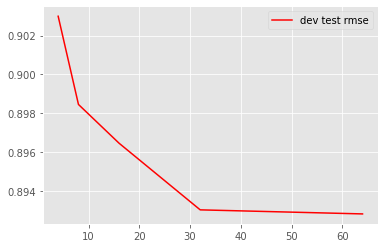

In [103]:
# 绘制各RANK的RMSE
plt.plot(ranks, rmse_test, label='dev test rmse', color='r')
plt.legend()

In [115]:
# 进行测试
fm = mcmc.FMRegression(n_iter=300, rank=32, random_state=seed)
fm.fit_predict(X_train, y_train, X_test)
y_pred = fm.fit_predict(X_train, y_train, X_test)
np.sqrt(mean_squared_error(y_pred, y_test))

0.921496840062798

In [116]:
# 标准化处理再测试
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
y_train_norm=scaler.fit_transform(y_train.reshape(-1,1)).ravel()

fm=mcmc.FMRegression(n_iter=300, rank=32, random_state=seed)
y_pred = fm.fit_predict(X_train, y_train_norm, X_test)
t_rmse=np.sqrt(mean_squared_error(scaler.inverse_transform(y_pred), y_test))

In [117]:
t_rmse

0.9203443782544464

min rmse: 0.9298, argmin: 96


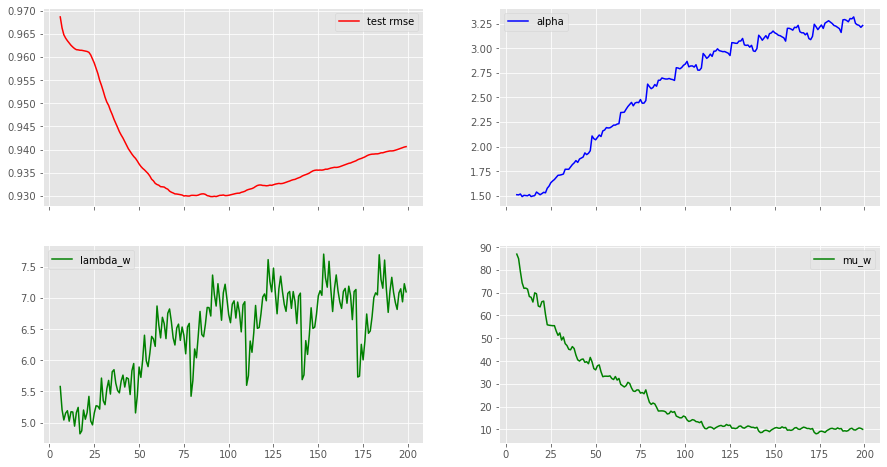

In [118]:
# 用最优rank批量测试
n_iter = 200
step_size = 1
seed = 123
rank = 32

fm = mcmc.FMRegression(n_iter=0, rank=rank, random_state=seed)
fm.fit_predict(X_train, y_train_norm, X_test)

rmse_test = []
rmse_new = []
hyper_param = np.zeros((n_iter -1, 3 + 2 * rank), dtype=np.float64)
for nr, i in enumerate(range(1, n_iter)):
    fm.random_state = i * seed
    y_pred = fm.fit_predict(X_train, y_train_norm, X_test, n_more_iter=step_size)
    rmse_test.append(np.sqrt(mean_squared_error(scaler.inverse_transform(y_pred), y_test)))
    hyper_param[nr, :] = fm.hyper_param_

values = np.arange(1, n_iter)
x = values * step_size
burn_in = 5
x = x[burn_in:]

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(15, 8))

axes[0, 0].plot(x, rmse_test[burn_in:], label='test rmse', color="r")
axes[0, 0].legend()
axes[0, 1].plot(x, hyper_param[burn_in:,0], label='alpha', color="b")
axes[0, 1].legend()
axes[1, 0].plot(x, hyper_param[burn_in:,1], label='lambda_w', color="g")
axes[1, 0].legend()
axes[1, 1].plot(x, hyper_param[burn_in:,3], label='mu_w', color="g")
axes[1, 1].legend()

print("min rmse: {:.4f}, argmin: {}".format(np.min(rmse_test), x[np.argmin(rmse_test)]))

## 用用户和电影之外的信息

In [121]:
lens['user_id'] = lens['user_id'].astype(str)
lens['movie_id'] = lens['movie_id'].astype(str)
lens['year'] = lens['date'].apply(str).str.split('-').str.get(0)
lens['release_year'] = lens['release_date'].apply(str).str.split('-').str.get(2)

# 设定5个组合
candidate_columns = [
    ['user_id','movie_id', 'release_year', 'age', 'sex', 'year',  'rating'],
    ['user_id','movie_id', 'age', 'sex', 'year',  'rating'],
    ['user_id','movie_id', 'sex', 'year',  'rating'],
    ['user_id','movie_id', 'age', 'sex', 'rating'],    
    ['user_id','movie_id', 'rating'],    
]

In [122]:
rmse_test = []

n_iter = 500
seed = 123
rank = 8


for column in candidate_columns:
    filtered_lens = lens[column].dropna()
    v = DictVectorizer()
    X_more_feature = v.fit_transform(list(filtered_lens.drop('rating', axis=1).T.to_dict().values()))
    y_more_feature = filtered_lens['rating'].tolist()

    X_mf_train, X_mf_test, y_mf_train, y_mf_test = train_test_split(X_more_feature, y_more_feature, test_size=0.1, random_state=42)

    scaler = StandardScaler()
    y_mf_train_norm = scaler.fit_transform(np.array(y_mf_train).reshape(-1, 1)).ravel()

    fm = mcmc.FMRegression(n_iter=n_iter, rank=rank, random_state=seed)
    # Allocates and initalizes the model and hyper parameter.
    fm.fit_predict(X_mf_train, y_mf_train_norm, X_mf_test)

    y_pred = fm.fit_predict(X_mf_train, y_mf_train_norm, X_mf_test)
    rmse_test.append(np.sqrt(mean_squared_error(scaler.inverse_transform(y_pred.reshape(-1, 1)), y_mf_test)))

print(rmse_test)

[0.8966348934997592, 0.8943648217648882, 0.8850451737482934, 0.8922375852811406, 0.887744557428427]


(0.88, 0.92)

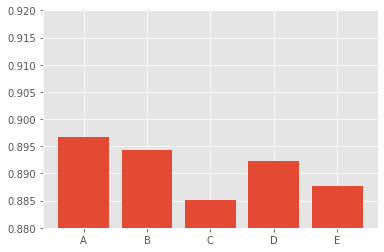

In [123]:
ind = np.arange(len(rmse_test))
bar = plt.bar(ind, height=rmse_test)
plt.xticks(ind, ('A', 'B', 'C', 'D', 'E'))
plt.ylim((0.88, 0.92))